# Laboratorio 6 Analisis de pcap de red
Marco Jurado 20308

In [116]:
#!pip install scapy

In [117]:
from scapy.all import *
import pandas as pd
import numpy as np
import binascii
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from scapy.all import IP, TCP, UDP, Raw, rdpcap

### Parte 1 - Preámbulo

In [118]:
pcap = sniff(count=25)

3. Imprima el tipo de variable, la longitud y el contenido del variable.

In [119]:
type(pcap)

scapy.plist.PacketList

In [120]:
len(pcap)

25

In [121]:
pcap

<Sniffed: TCP:20 UDP:4 ICMP:0 Other:1>

4. Imprima el tipo de dato del primer paquete capturado

In [122]:
type(pcap[0])

scapy.layers.l2.Ether

5. Imprima el contenido de 5 is.

In [123]:
for i in range(5):
    print(pcap[i])

Ether / ARP who has 192.168.1.1 says 192.168.1.16
Ether / IP / TCP 192.168.1.18:55260 > 20.189.173.7:https PA / Raw
Ether / IP / TCP 192.168.1.18:55260 > 20.189.173.7:https A / Raw
Ether / IP / TCP 192.168.1.18:55260 > 20.189.173.7:https A / Raw
Ether / IP / TCP 192.168.1.18:55260 > 20.189.173.7:https A / Raw


### Parte 2 - Análisis estadístico

1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.

In [124]:
analisis_paquetes = rdpcap('analisis_paquetes.pcap')

2. Convierta la variable a un DataFrame.

In [125]:
# utilizando lógica del archivo de ejemplo visto en clase podemos convertir a DF manteniendo sus caracteristicas de
#    IP
#    TCP
#    Source y destino
#    Payload
#    Address

def convertir_paquetes_a_dataframe(paquetes):
    datos_paquetes = []

    for packet in paquetes:
        tiempo = packet.time
        src_address = packet[IP].src if IP in packet else None
        dst_address = packet[IP].dst if IP in packet else None

        if TCP in packet:
            src_port = packet[TCP].sport
            dst_port = packet[TCP].dport
        elif UDP in packet:
            src_port = packet[UDP].sport
            dst_port = packet[UDP].dport
        else:
            src_port = None
            dst_port = None

        payload = len(packet[Raw].load) if Raw in packet else 0

        datos_paquetes.append({
            'Time': tiempo,
            'Src Address': src_address,
            'Dst Address': dst_address,
            'Src Port': src_port,
            'Dst Port': dst_port,
            'Payload': payload
        })

    df = pd.DataFrame(datos_paquetes)
    return df

analisis_paquetes = rdpcap('analisis_paquetes.pcap')

df_paquetes = convertir_paquetes_a_dataframe(analisis_paquetes)

In [126]:
df_paquetes

,Time,Src Address,Dst Address,Src Port,Dst Port,Payload
0,1532199330.917674,10.1.10.53,84.54.22.33,53,53,905
1,1532199330.950107,84.54.22.33,10.1.10.53,53,53,0
2,1532199331.937777,10.1.10.53,84.54.22.33,53,53,919
3,1532199331.956635,84.54.22.33,10.1.10.53,53,53,0
4,1532199332.960504,10.1.10.53,84.54.22.33,53,53,956
...,...,...,...,...,...,...
57,1532199357.446249,84.54.22.33,10.1.10.53,53,53,0
58,1532199358.456765,10.1.10.53,84.54.22.33,53,53,913
59,1532199358.471973,84.54.22.33,10.1.10.53,53,53,0
60,1532199359.479115,10.1.10.53,84.54.22.33,53,53,532


3. Muestre el contenido de las primeras 5 filas del dataset.

In [127]:
df_paquetes.head()

,Time,Src Address,Dst Address,Src Port,Dst Port,Payload
0,1532199330.917674,10.1.10.53,84.54.22.33,53,53,905
1,1532199330.950107,84.54.22.33,10.1.10.53,53,53,0
2,1532199331.937777,10.1.10.53,84.54.22.33,53,53,919
3,1532199331.956635,84.54.22.33,10.1.10.53,53,53,0
4,1532199332.960504,10.1.10.53,84.54.22.33,53,53,956


4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.

In [128]:
df_paquetes[['Src Address', 'Dst Address', 'Src Port', 'Dst Port']]

,Src Address,Dst Address,Src Port,Dst Port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
57,84.54.22.33,10.1.10.53,53,53
58,10.1.10.53,84.54.22.33,53,53
59,84.54.22.33,10.1.10.53,53,53
60,10.1.10.53,84.54.22.33,53,53


5. Estadísticas

In [129]:
df_paquetes['Src Address'].unique()

array(['10.1.10.53', '84.54.22.33', '75.75.75.75'], dtype=object)

In [130]:
df_paquetes['Dst Address'].unique()

array(['84.54.22.33', '10.1.10.53', '75.75.75.75'], dtype=object)

¿Cuál es la IP origen más frecuente?

In [131]:
ip_origen_frecuente = df_paquetes['Src Address'].mode()[0]
print("La IP origen más frecuente es:", ip_origen_frecuente)

La IP origen más frecuente es: 10.1.10.53


¿A qué IP destino se comunica con más frecuencia?

In [132]:
ip_destino_frecuente = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]['Dst Address'].mode()[0]
print("La IP destino más frecuente para la IP origen más frecuente es:", ip_destino_frecuente)

La IP destino más frecuente para la IP origen más frecuente es: 84.54.22.33


¿A qué puerto destino se comunica?

In [133]:
puerto_destino_frecuente = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]['Dst Port'].mode()[0]
print("El puerto destino más frecuente para la IP origen más frecuente es:", puerto_destino_frecuente)

El puerto destino más frecuente para la IP origen más frecuente es: 53


¿Desde qué puertos origen se comunica?

In [134]:
puertos_origen = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]['Src Port'].unique()
print("Puertos origen desde los cuales se comunica la IP origen más frecuente:", puertos_origen)

Puertos origen desde los cuales se comunica la IP origen más frecuente: [   53 15812 23903]


6. Gráficas

a. Gráfica de barras de las IPs origen y la suma de payloads

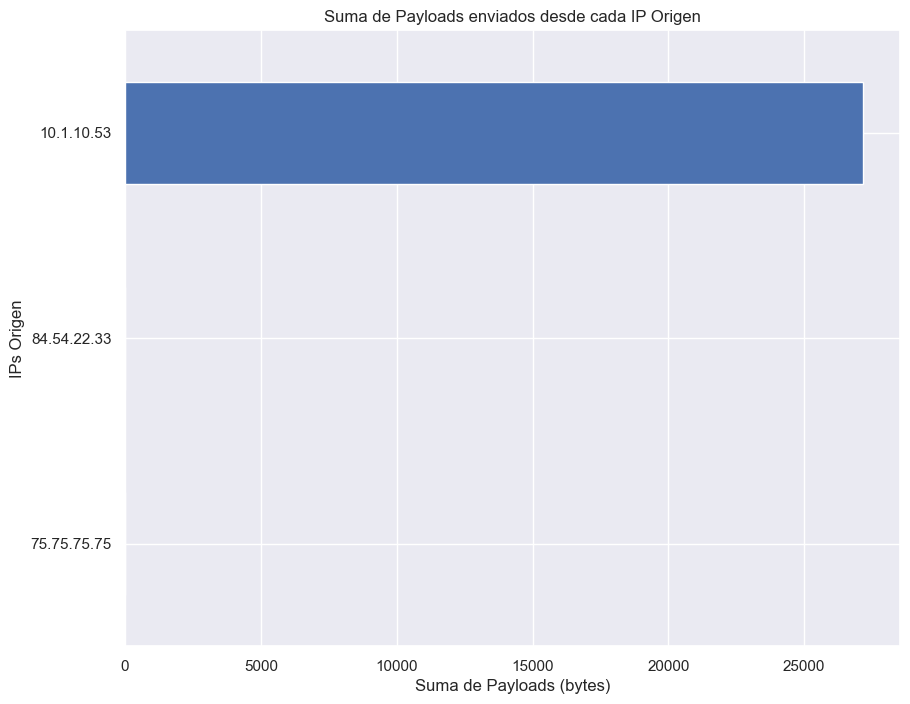

In [135]:
suma_payloads_origen = df_paquetes.groupby('Src Address')['Payload'].sum().sort_values()
plt.figure(figsize=(10, 8))
suma_payloads_origen.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs Origen')
plt.title('Suma de Payloads enviados desde cada IP Origen')
plt.show()

b. Gráfica de barras de las IPs destino y la suma de payloads

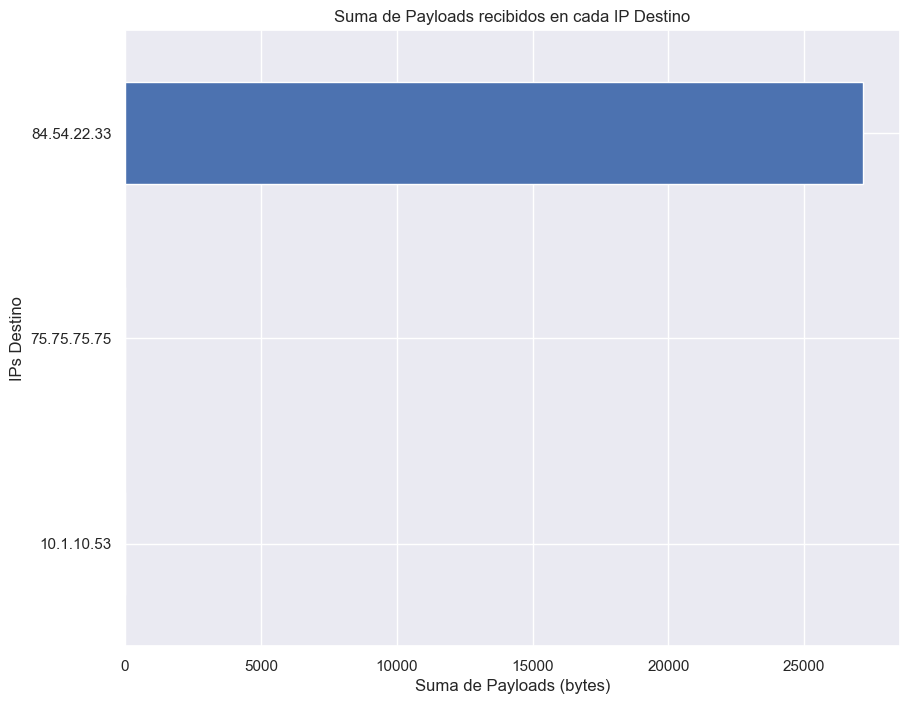

In [136]:
suma_payloads_destino = df_paquetes.groupby('Dst Address')['Payload'].sum().sort_values()
plt.figure(figsize=(10, 8))
suma_payloads_destino.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs Destino')
plt.title('Suma de Payloads recibidos en cada IP Destino')
plt.show()

c. Gráfica de barras de los puertos origen y la suma de payloads

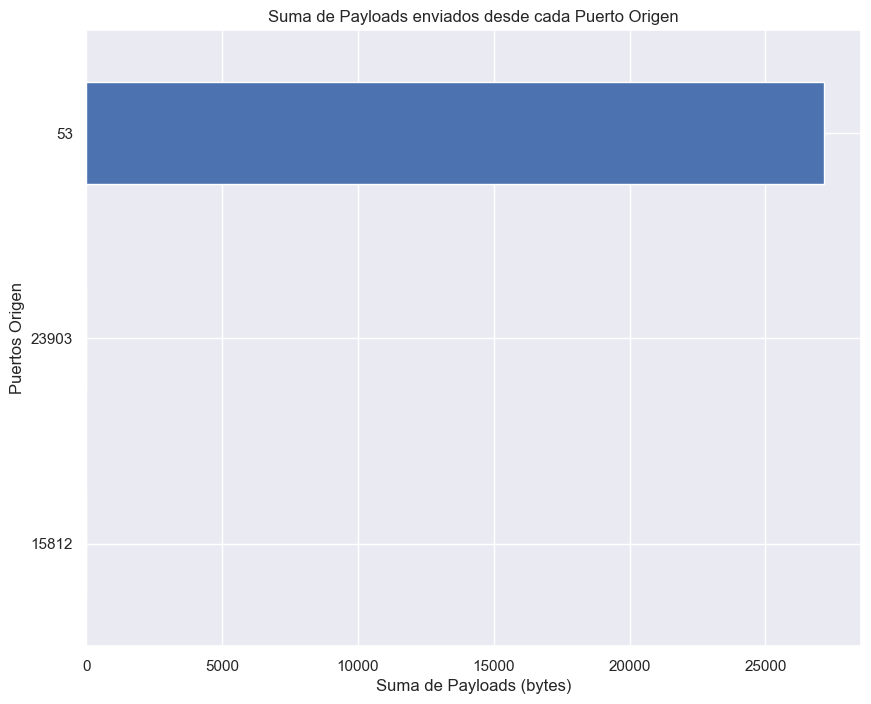

In [137]:
suma_payloads_puerto_origen = df_paquetes.groupby('Src Port')['Payload'].sum().sort_values()
plt.figure(figsize=(10, 8))
suma_payloads_puerto_origen.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos Origen')
plt.title('Suma de Payloads enviados desde cada Puerto Origen')
plt.show()

d. Gráfica de barras de los puertos destino y la suma de payloads

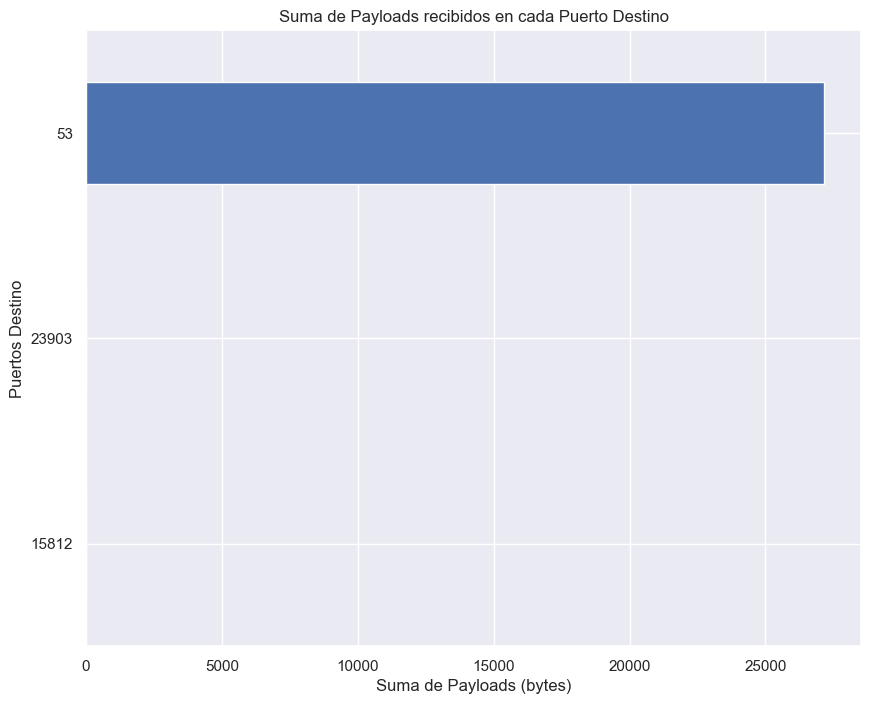

In [138]:
suma_payloads_puerto_destino = df_paquetes.groupby('Dst Port')['Payload'].sum().sort_values()
plt.figure(figsize=(10, 8))
suma_payloads_puerto_destino.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos Destino')
plt.title('Suma de Payloads recibidos en cada Puerto Destino')
plt.show()

e. Gráfica de barras verticales del payload y el tiempo para la IP origen más frecuente

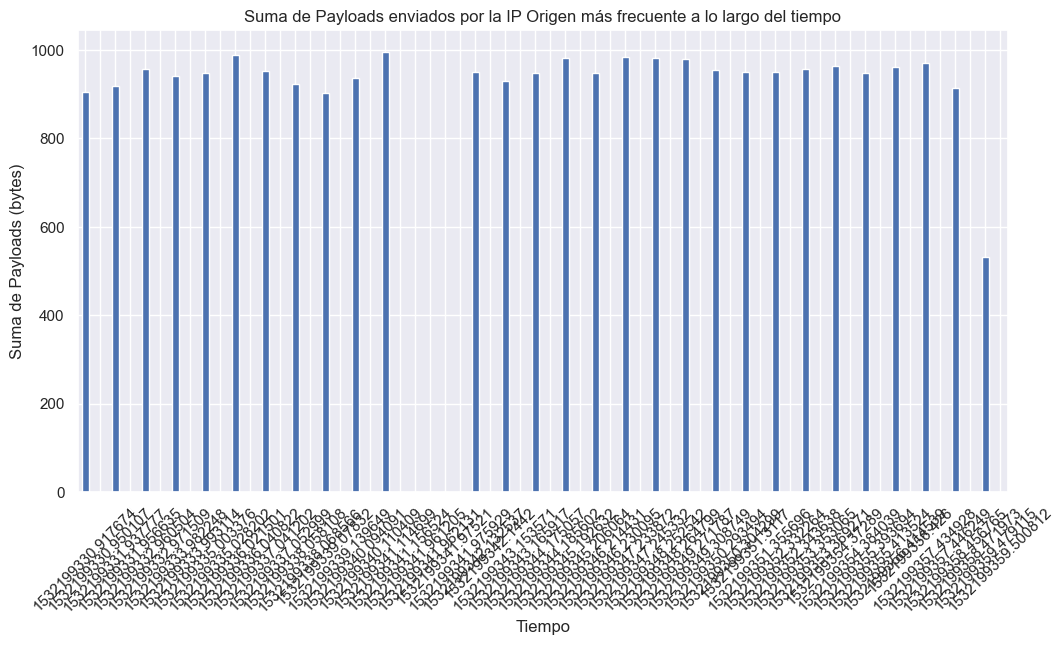

In [139]:
df_paquetes['Time'] = df_paquetes['Time'].astype(float)

suma_payloads_tiempo = df_paquetes.groupby('Time')['Payload'].sum()
plt.figure(figsize=(12, 6))
suma_payloads_tiempo.plot(kind='bar')
plt.xlabel('Tiempo')
plt.ylabel('Suma de Payloads (bytes)')
plt.title('Suma de Payloads enviados por la IP Origen más frecuente a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()


7. Investigación del payload

a. Crear un nuevo DataFrame con solo la IP origen más frecuente

In [140]:
ip_origen_frecuente = df_paquetes['Src Address'].mode()[0]
df_ip_origen_frecuente = df_paquetes[df_paquetes['Src Address'] == ip_origen_frecuente]

b. Nuevo DataFrame con las columnas necesarias y agrupadas

In [141]:
df_agrupado = df_ip_origen_frecuente.groupby('Dst Address')['Payload'].sum().reset_index()

c. Identificar la IP destino que más ha intercambiado bytes

In [142]:
ip_destino_sospechosa = df_agrupado[df_agrupado['Payload'] == df_agrupado['Payload'].max()]['Dst Address'].iloc[0]
ip_destino_sospechosa


'84.54.22.33'

d. Crear un nuevo DataFrame con la conversación entre la IP más frecuente y la IP sospechosa

In [143]:
df_conversacion = df_ip_origen_frecuente[(df_ip_origen_frecuente['Dst Address'] == ip_destino_sospechosa)]

e. Extraer los payloads en un array

In [144]:
array_payloads = df_conversacion['Payload'].to_list()

f. Mostrar el contenido del array

In [145]:
array_payloads

[905,
 919,
 956,
 942,
 947,
 989,
 952,
 923,
 903,
 936,
 995,
 950,
 930,
 948,
 981,
 948,
 983,
 981,
 979,
 954,
 950,
 950,
 957,
 963,
 949,
 961,
 971,
 913,
 532]

g. Análisis de los primeros bytes del payload

In [146]:
from scapy.all import rdpcap, IP, TCP, UDP, Raw

paquetes = rdpcap('analisis_paquetes.pcap')

data = []
for paquete in paquetes:
    if IP in paquete:
        src_address = paquete[IP].src
        dst_address = paquete[IP].dst
        src_port = paquete[TCP].sport if TCP in paquete else None
        dst_port = paquete[TCP].dport if TCP in paquete else None
        payload = len(paquete[Raw].load) if Raw in paquete else 0
        first_10_bytes = paquete[Raw].load[:10] if Raw in paquete else None
        data.append({
            'Src Address': src_address,
            'Dst Address': dst_address,
            'Src Port': src_port,
            'Dst Port': dst_port,
            'Payload': payload,
            'First 10 Bytes': first_10_bytes
        })

df_paquetes = pd.DataFrame(data)

In [147]:
df_paquetes['First 10 Bytes']

0              b'\xef\xbf\xbdPNG\r\n\x1a\n'
1                                      None
2           b':\xef\xbf\xbdle:\xc7\xa9\xef'
3                                      None
4     b'\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf'
                      ...                  
57                                     None
58       b'\xef\xbf\xbdXH\x04j\x17\x00\xef'
59                                     None
60    b'w\xef\xbf\xbd\x04\x10\xef\xbf\xbd['
61                                     None
Name: First 10 Bytes, Length: 62, dtype: object